In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_per_arm.csv')

In [3]:
for col in df.columns:
    print(col)

Parcelle
n_cep
symptomes
date
picture_name
cep_name
position_cm
distance_for_GU
position_organ
position_organ_2
symptom
organ+symptomes
total_perimeter_cm
dysfunctional_perimeter_cm_1
dysfunctional_perimeter_cm_2
dysfunctional_perimeter_cm_3
dysfunctional_perimeter_cm_4
necrotic_perimeter_1
necrotic_perimeter_2
necrotic_perimeter_3
necrotic_perimeter_4
necrotic_perimeter_5
Total_dysfunctional_perimeter
Total_necrotic_perimeter
Share_dysfunctional_perimeter
Share_necrotic_perimeter
Principal
Second
Third
Fourth
comment


In [4]:
df['dysfunctional_perimeter_cm_1'] = df['dysfunctional_perimeter_cm_1'].astype(str)
df['dysfunctional_perimeter_cm_2'] = df['dysfunctional_perimeter_cm_2'].astype(str)
df['dysfunctional_perimeter_cm_3'] = df['dysfunctional_perimeter_cm_3'].astype(str)
df['dysfunctional_perimeter_cm_4'] = df['dysfunctional_perimeter_cm_4'].astype(str)

df['dysfunctional_perimeter_cm_1'] = df['dysfunctional_perimeter_cm_1'].apply(lambda x: x.replace(',' , '.'))
df['dysfunctional_perimeter_cm_2'] = df['dysfunctional_perimeter_cm_2'].apply(lambda x: x.replace(',' , '.'))
df['dysfunctional_perimeter_cm_3'] = df['dysfunctional_perimeter_cm_3'].apply(lambda x: x.replace(',' , '.'))
df['dysfunctional_perimeter_cm_4'] = df['dysfunctional_perimeter_cm_4'].apply(lambda x: x.replace(',' , '.'))

df['dysfunctional_perimeter_cm_1'] = df['dysfunctional_perimeter_cm_1'].astype(float)
df['dysfunctional_perimeter_cm_2'] = df['dysfunctional_perimeter_cm_2'].astype(float)
df['dysfunctional_perimeter_cm_3'] = df['dysfunctional_perimeter_cm_3'].astype(float)
df['dysfunctional_perimeter_cm_4'] = df['dysfunctional_perimeter_cm_4'].astype(float)

df['dysfunctional_perimeter_cm_1'] = df['dysfunctional_perimeter_cm_1'].fillna(0)
df['dysfunctional_perimeter_cm_2'] = df['dysfunctional_perimeter_cm_2'].fillna(0)
df['dysfunctional_perimeter_cm_3'] = df['dysfunctional_perimeter_cm_3'].fillna(0)
df['dysfunctional_perimeter_cm_4'] = df['dysfunctional_perimeter_cm_4'].fillna(0)

In [5]:
df['Total_dysfunctional_perimeter'] = df['dysfunctional_perimeter_cm_1'] + df['dysfunctional_perimeter_cm_2'] + df['dysfunctional_perimeter_cm_3'] + df['dysfunctional_perimeter_cm_4']

In [6]:
df_data = df[['Parcelle','n_cep', 'cep_name','symptom', 'position_cm', 'distance_for_GU','Total_dysfunctional_perimeter','total_perimeter_cm']]

In [7]:
df_data.head(5)

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.61
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.58
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,"10,774"
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,"8,001"
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,"7,359"


In [8]:
df_data.describe()

,position_cm,distance_for_GU,Total_dysfunctional_perimeter
count,438.000000,438.000000,438.00000
mean,32.635845,12.458904,1.44768
std,21.292781,21.316524,2.21536
min,-3.000000,-27.000000,0.00000
25%,15.000000,-5.000000,0.00000
50%,32.000000,11.000000,0.46850
75%,47.000000,28.000000,1.93850
max,97.000000,76.000000,11.13100


In [9]:
df_data['total_perimeter_cm'] = df_data['total_perimeter_cm'].astype(str)
df_data['position_cm'] = df_data['position_cm'].astype(str)

df_data = df_data[df['total_perimeter_cm'] != '??']
df_data = df_data.reset_index().drop(columns = ['index'])

df_data['total_perimeter_cm'] = df_data['total_perimeter_cm'].apply(lambda x: x.replace(',' , '.'))
df_data['position_cm'] = df_data['position_cm'].apply(lambda x: x.replace(',' , '.'))

df_data['total_perimeter_cm'] = df_data['total_perimeter_cm'].astype(float)
df_data['position_cm'] = df_data['position_cm'].astype(float)

/tmp/ipykernel_2104/2218968179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['total_perimeter_cm'] = df_data['total_perimeter_cm'].astype(str)
/tmp/ipykernel_2104/2218968179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['position_cm'] = df_data['position_cm'].astype(str)


In [10]:
df_data.describe()

,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm
count,437.000000,437.000000,437.000000,403.000000
mean,32.710526,12.389016,1.450992,13.275940
std,21.259678,21.290658,2.216812,5.122166
min,-3.000000,-27.000000,0.000000,4.123000
25%,15.000000,-5.000000,0.000000,8.723500
50%,32.000000,11.000000,0.470000,12.874000
75%,47.000000,28.000000,1.941000,17.293500
max,97.000000,76.000000,11.131000,26.524000


In [11]:
df_data = df_data.dropna()

In [12]:
df_data.describe()

,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm
count,403.000000,403.000000,403.000000,403.000000
mean,32.745658,11.746898,1.573409,13.275940
std,20.816701,20.679783,2.266451,5.122166
min,0.000000,-27.000000,0.000000,4.123000
25%,15.500000,-4.750000,0.000000,8.723500
50%,32.000000,10.000000,0.592000,12.874000
75%,47.000000,27.000000,2.120500,17.293500
max,97.000000,76.000000,11.131000,26.524000


In [13]:
df_data['perc_dysf'] = (df_data['Total_dysfunctional_perimeter'] / df_data['total_perimeter_cm'])*100

In [14]:
df_data.describe()

,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,32.745658,11.746898,1.573409,13.275940,12.155133
std,20.816701,20.679783,2.266451,5.122166,15.549288
min,0.000000,-27.000000,0.000000,4.123000,0.000000
25%,15.500000,-4.750000,0.000000,8.723500,0.000000
50%,32.000000,10.000000,0.592000,12.874000,4.926987
75%,47.000000,27.000000,2.120500,17.293500,20.980694
max,97.000000,76.000000,11.131000,26.524000,81.574181


In [15]:
df_data.head()

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.610,0.000000
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.580,0.000000
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,10.774,0.000000
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,8.001,7.686539
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,7.359,0.000000


In [16]:
df_data.columns

Index(['Parcelle', 'n_cep', 'cep_name', 'symptom', 'position_cm',
       'distance_for_GU', 'Total_dysfunctional_perimeter',
       'total_perimeter_cm', 'perc_dysf'],
      dtype='object')

In [17]:
df_data['symptom'].loc[df_data['cep_name'].isin(['69-80U', '69-80D'])] = 'AS'

/tmp/ipykernel_2104/2191911226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['symptom'].loc[df_data['cep_name'].isin(['69-80U', '69-80D'])] = 'AS'


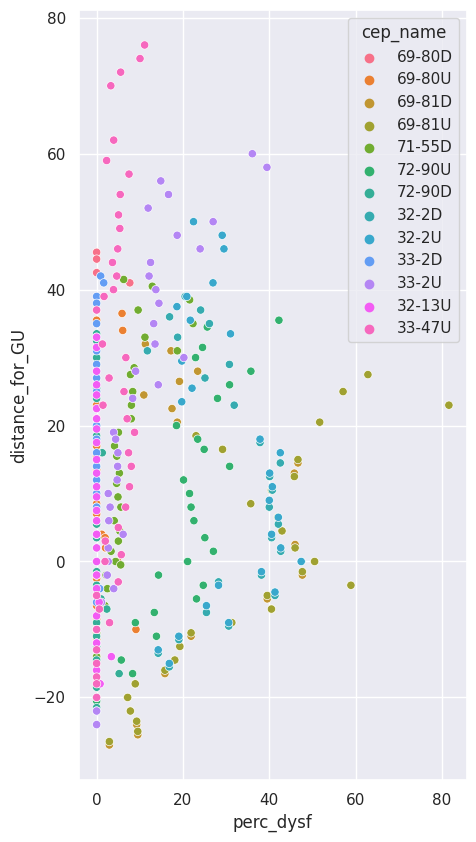

In [18]:
sns.set(rc={'figure.figsize':(5,10)})
sns.scatterplot(x = df_data['perc_dysf'], y = df_data['distance_for_GU'], hue = df_data['cep_name'])
plt.show()

In [19]:
df_sub = df_data.groupby('cep_name', axis = 0, as_index=False).first()
df_sub = df_sub.sort_values(by = 'symptom', ascending=False)
df_sub
hue_ls = df_sub['cep_name'].tolist()

In [20]:
hue_ls

['32-2D',
 '32-2U',
 '33-2U',
 '33-47U',
 '69-81D',
 '69-81U',
 '71-55D',
 '72-90U',
 '32-13U',
 '33-2D',
 '69-80D',
 '69-80U',
 '72-90D']

In [21]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

In [22]:
l_type = {}
for i in hue_ls:
    l_type[i] = '--'

In [23]:
l_type

{'32-2D': '--',
 '32-2U': '--',
 '33-2U': '--',
 '33-47U': '--',
 '69-81D': '--',
 '69-81U': '--',
 '71-55D': '--',
 '72-90U': '--',
 '32-13U': '--',
 '33-2D': '--',
 '69-80D': '--',
 '69-80U': '--',
 '72-90D': '--'}

In [24]:
l_type = ['--','--','--','--','--', '--','--','--','--','-.','-.','-.','-.']

In [25]:
df_data['Symptoms'] = df_data['symptom'].apply(lambda x: 'S' if x == 'transition' else x)

In [26]:
df_data['Vine Arm Code'] = df_data['cep_name']

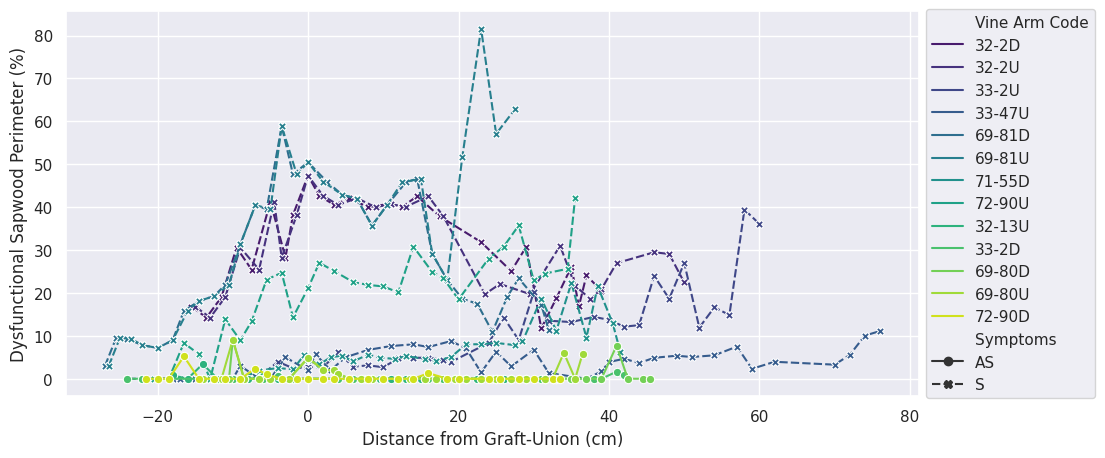

In [27]:
plt.figure(figsize = (11,5))
sns.color_palette("viridis", 13)

sns.lineplot(
    x='distance_for_GU',
    y='perc_dysf',
    hue='Vine Arm Code',
    data=df_data,
    ci=None,  # Confidence intervals are not applicable for a line plot
    markers=True,  # Display markers at data points
    style='Symptoms',  # Do not use dashes for the line
    palette="viridis",
    hue_order=hue_ls,
)
plt.legend(fontsize='9')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tif", dpi = 300)
plt.savefig('figure_dysf_sap_flow.tiff', dpi=300, bbox_inches='tight')
plt.show()

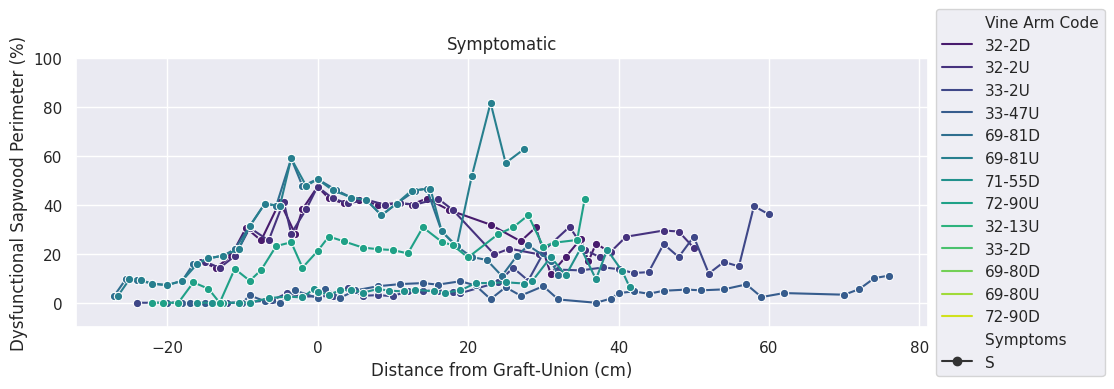

In [28]:
plt.figure(figsize = (11,3.5))
sns.color_palette("viridis", 13)

sns.lineplot(
    x='distance_for_GU',
    y='perc_dysf',
    hue='Vine Arm Code',
    data=df_data[df_data['Symptoms'] == 'S'],
    ci=None,  # Confidence intervals are not applicable for a line plot
    markers=True,  # Display markers at data points
    style='Symptoms',  # Do not use dashes for the line
    palette="viridis",
    hue_order=hue_ls,
)
plt.title("Symptomatic")
plt.legend(fontsize='9')
plt.ylim(-10, 100)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

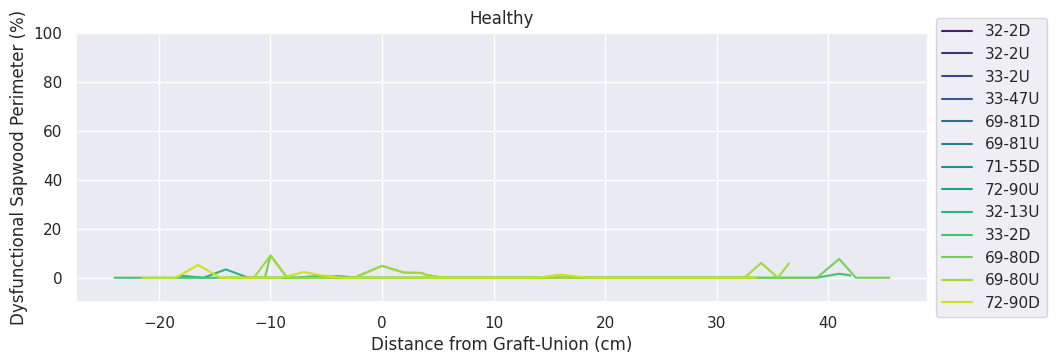

In [29]:
plt.figure(figsize = (11,3.5))
sns.color_palette("viridis", 13)

sns.lineplot(
    x='distance_for_GU',
    y='perc_dysf',
    hue='Vine Arm Code',
    data=df_data[df_data['Symptoms'] == 'AS'],
    ci=None,  # Confidence intervals are not applicable for a line plot
    markers=True,  # Display markers at data points
    palette="viridis",
    hue_order=hue_ls,
)

plt.title("Healthy")
plt.legend(fontsize='9')
plt.ylim(-10, 100)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

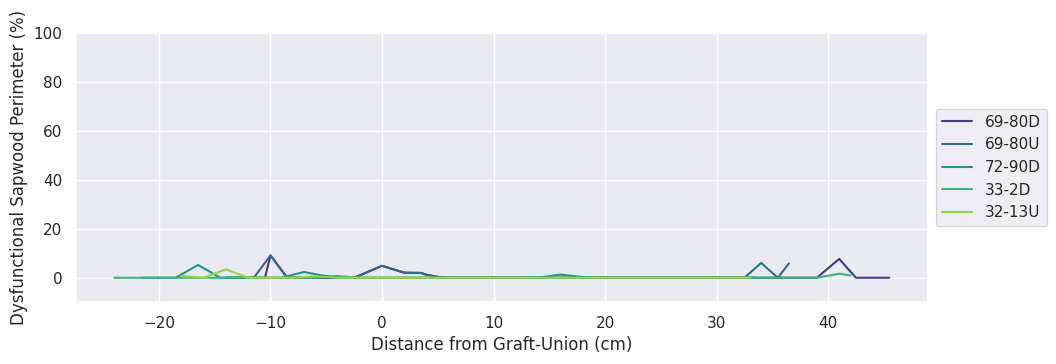

In [30]:
plt.figure(figsize = (11,3.5))
sns.color_palette("viridis", 13)

sns.lineplot(
    x='distance_for_GU',
    y='perc_dysf',
    hue='Vine Arm Code',
    data=df_data[df_data['Symptoms'] == 'AS'],
    ci=None,  # Confidence intervals are not applicable for a line plot
    markers=True,  # Display markers at data points
    palette="viridis",
)
plt.legend(fontsize='9')
plt.ylim(-10, 100)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

In [32]:
df_data.head()

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf,Symptoms,Vine Arm Code
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.610,0.000000,AS,69-80D
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.580,0.000000,AS,69-80D
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,10.774,0.000000,AS,69-80D
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,8.001,7.686539,AS,69-80D
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,7.359,0.000000,AS,69-80D


In [52]:
df_data_up.columns.tolist().append('perc_dist_from_GU')

In [ ]:
#taking whole vine length as reference
df_data_up = df_data[df_data['distance_for_GU'] > 0].copy()
df_up = pd.DataFrame(columns = df_data_up.columns)
df_up['perc_dist_from_GU'] = None

for cep in df_data_up['cep_name'].unique():
    df_sub = df_data_up[df_data_up['cep_name'] == cep].copy()
    df_sub['perc_dist_from_GU'] = df_sub['distance_for_GU']/df_sub['distance_for_GU'].max()
    df_up = pd.concat([df_up, df_sub], ignore_index = True)

In [60]:
df_data_up = df_data[df_data['distance_for_GU'] > 0].copy()
df_up = pd.DataFrame(columns = df_data_up.columns)
df_up['perc_dist_from_GU'] = None

for cep in df_data_up['cep_name'].unique():
    df_sub = df_data_up[df_data_up['cep_name'] == cep].copy()
    df_sub['perc_dist_from_GU'] = df_sub['distance_for_GU']/df_sub['distance_for_GU'].max()
    df_up = pd.concat([df_up, df_sub], ignore_index = True)

df_data_down = df_data[df_data['distance_for_GU'] <= 0].copy()
df_down = pd.DataFrame(columns = df_data_down.columns)
df_down['perc_dist_from_GU'] = None

for cep in df_data_down['cep_name'].unique():
    df_sub = df_data_down[df_data_up['cep_name'] == cep].copy()
    df_sub['perc_dist_from_GU'] = df_sub['distance_for_GU']/df_sub['distance_for_GU'].min()
    df_down = pd.concat([df_down, df_sub], ignore_index = True)

df_perc = pd.concat

In [61]:
df_up

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf,Symptoms,Vine Arm Code,perc_dist_from_GU
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.610,0.000000,AS,69-80D,1.000000
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.580,0.000000,AS,69-80D,0.978022
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,10.774,0.000000,AS,69-80D,0.934066
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,8.001,7.686539,AS,69-80D,0.901099
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,7.359,0.000000,AS,69-80D,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...
259,III-6,33-47,33-47U,S,66.0,11.0,1.378,18.080,7.621681,S,33-47U,0.144737
260,III-6,33-47,33-47U,S,69.0,8.0,1.206,17.921,6.729535,S,33-47U,0.105263
261,III-6,33-47,33-47U,S,72.0,5.0,0.881,17.571,5.013943,S,33-47U,0.065789
262,III-6,33-47,33-47U,S,74.0,3.0,0.377,18.855,1.999470,S,33-47U,0.039474


In [40]:
df_data_up.head()

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf,Symptoms,Vine Arm Code,perc_dist_from_GU
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.610,0.000000,AS,69-80D,0.598684
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.580,0.000000,AS,69-80D,0.585526
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,10.774,0.000000,AS,69-80D,0.559211
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,8.001,7.686539,AS,69-80D,0.539474
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,7.359,0.000000,AS,69-80D,0.513158


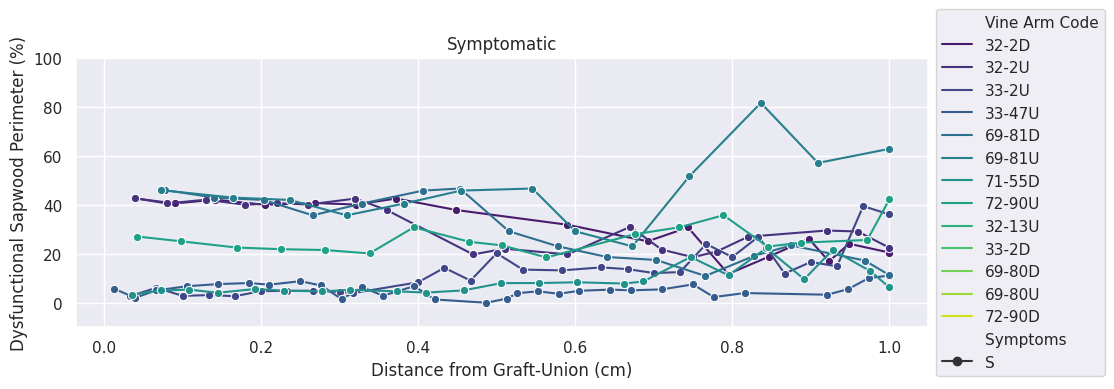

In [62]:
plt.figure(figsize = (11,3.5))
sns.color_palette("viridis", 13)

sns.lineplot(
    x='perc_dist_from_GU',
    y='perc_dysf',
    hue='Vine Arm Code',
    data=df_up[df_up['Symptoms'] == 'S'],
    ci=None,  # Confidence intervals are not applicable for a line plot
    markers=True,  # Display markers at data points
    style='Symptoms',  # Do not use dashes for the line
    palette="viridis",
    hue_order=hue_ls,
)
plt.title("Symptomatic")
plt.legend(fontsize='9')
plt.ylim(-10, 100)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/jerome/.pyenv/

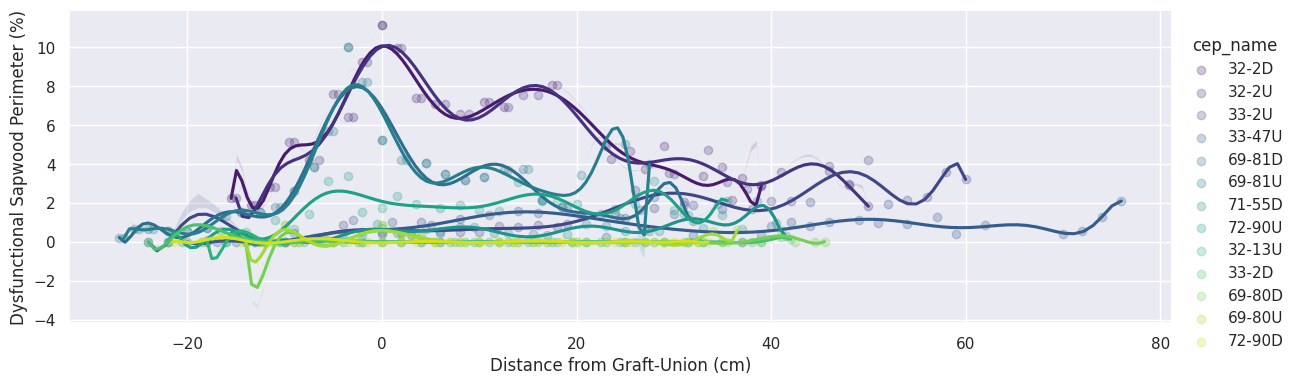

In [31]:
sns.color_palette("viridis", 13)
sns.lmplot(x = 'distance_for_GU', y = 'Total_dysfunctional_perimeter', hue = 'cep_name', data = df_data, ci = True, truncate=True, order = 15, height=4, aspect=3, palette = "viridis", scatter_kws={'alpha':0.25}, hue_order = hue_ls)
#sns.lmplot(x = 'distance_for_GU', y = 'Total_dysfunctional_perimeter', hue = 'symptom', data = df_data, ci = True, truncate=True, order = 6, height=4, aspect=3, palette = "viridis", scatter_kws={'alpha':0})
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

In [143]:
df_data.head(5)

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf,Symptoms,Vine Arm Code
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.610,0.000000,AS,69-80D
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.580,0.000000,AS,69-80D
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,10.774,0.000000,AS,69-80D
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,8.001,7.686539,AS,69-80D
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,7.359,0.000000,AS,69-80D


In [144]:
for cep in hue_ls:
    df_sub = df_data[df_data['cep_name'] == cep]
    print(len(df_sub['n_cep']))

26
28
36
41
32
29
33
30
27
28
34
30
29


In [145]:
df_new = {'x' : [], 'y' : [], 'symptoms' : [], 'cep_name' : []}

In [146]:
df_new = pd.DataFrame(df_new)

In [147]:
df_new

,x,y,symptoms,cep_name


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [149]:
df_sub = df_data[df_data['cep_name'] == '32-2D'].sort_values(by = ['distance_for_GU'])

In [150]:
df_sub

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf,Symptoms,Vine Arm Code
246,III-6,32-2,32-2D,S,54.5,-15.5,2.245,13.341,16.827824,S,32-2D
245,III-6,32-2,32-2D,S,52.5,-13.5,1.925,13.501,14.258203,S,32-2D
244,III-6,32-2,32-2D,S,50.5,-11.5,2.827,14.849,19.038319,S,32-2D
243,III-6,32-2,32-2D,S,48.5,-9.5,5.146,16.825,30.585438,S,32-2D
242,III-6,32-2,32-2D,S,46.5,-7.5,4.222,16.607,25.423014,S,32-2D
241,III-6,32-2,32-2D,S,44.0,-5.0,7.622,18.456,41.298223,S,32-2D
240,III-6,32-2,32-2D,S,42.0,-3.0,6.436,22.800,28.228070,S,32-2D
239,III-6,32-2,32-2D,S,41.0,-2.0,9.234,24.196,38.163333,S,32-2D
238,III-6,32-2,32-2D,S,39.0,0.0,11.131,23.499,47.367973,S,32-2D
237,III-6,32-2,32-2D,S,37.5,1.5,9.949,23.335,42.635526,S,32-2D


In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

df_new = {'x' : [], 'y' : [], 'symptom' : [], 'cep_name' : []}
df_new = pd.DataFrame(df_new)

for cep in hue_ls:

    df_sub = df_data[df_data['cep_name'] == cep].sort_values(by = ['distance_for_GU'])
    x = df_sub['distance_for_GU'].tolist()
    y = df_sub['Total_dysfunctional_perimeter'].tolist()
    xnew = np.linspace(int(min(x)), int(max(x)), 500)
    gfg = make_interp_spline(x, y, k=2)
    y_new = gfg(xnew)
    df_new_sub = pd.DataFrame({'x' : xnew, 'y' : y_new})
    df_new_sub['symptom'] = df_sub['symptom'].iloc[0]
    df_new_sub['cep_name'] = df_sub['cep_name'].iloc[0]
    df_new = pd.concat([df_new, df_new_sub], ignore_index=True)


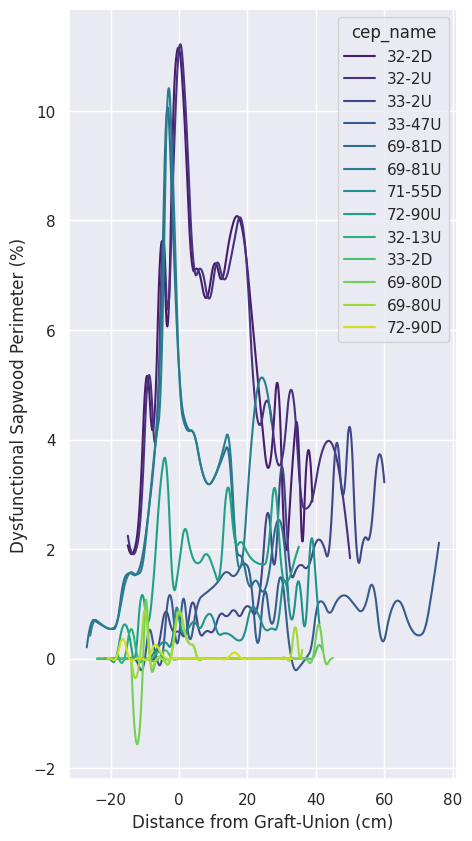

In [152]:
sns.color_palette("viridis", 13)
sns.lineplot(x = 'x', y = 'y', hue = 'cep_name', data = df_new, palette = "viridis", hue_order = hue_ls)
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

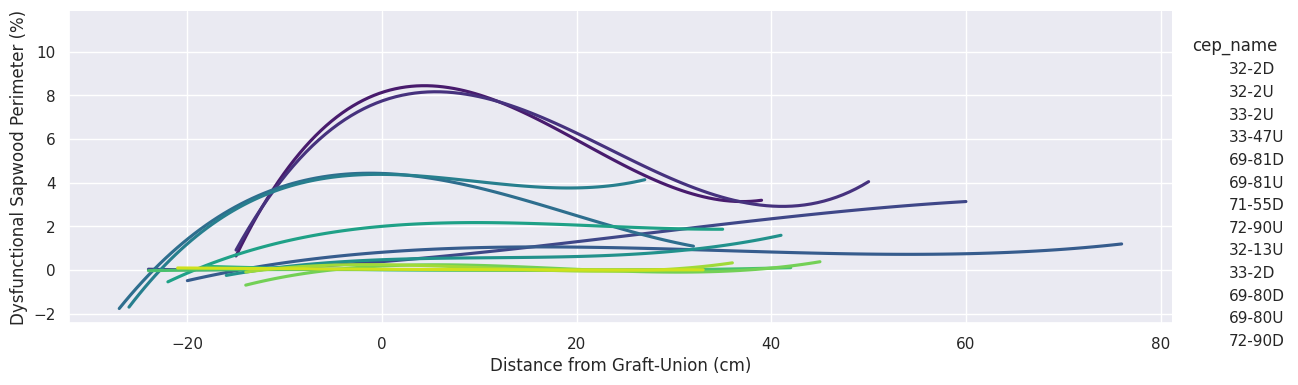

In [153]:
sns.color_palette("viridis", 13)
sns.lmplot(x = 'x', y = 'y', hue = 'cep_name', data = df_new, ci = True, truncate=True, order = 3, height=4, aspect=3, palette = "viridis", scatter_kws={'alpha':0}, hue_order = hue_ls)
plt.xlabel('Distance from Graft-Union (cm)')
plt.ylabel('Dysfunctional Sapwood Perimeter (%)')
plt.savefig("plot.tiff", dpi = 100)
plt.show()

In [154]:
df_data

,Parcelle,n_cep,cep_name,symptom,position_cm,distance_for_GU,Total_dysfunctional_perimeter,total_perimeter_cm,perc_dysf,Symptoms,Vine Arm Code
0,III-5,69-80,69-80D,AS,0.0,45.5,0.000,7.610,0.000000,AS,69-80D
1,III-5,69-80,69-80D,AS,1.0,44.5,0.000,10.580,0.000000,AS,69-80D
2,III-5,69-80,69-80D,AS,3.0,42.5,0.000,10.774,0.000000,AS,69-80D
3,III-5,69-80,69-80D,AS,4.5,41.0,0.615,8.001,7.686539,AS,69-80D
4,III-5,69-80,69-80D,AS,6.5,39.0,0.000,7.359,0.000000,AS,69-80D
...,...,...,...,...,...,...,...,...,...,...,...
432,III-6,33-47,33-47U,S,90.0,-13.0,0.000,14.961,0.000000,S,33-47U
433,III-6,33-47,33-47U,S,92.0,-15.0,0.000,13.892,0.000000,S,33-47U
434,III-6,33-47,33-47U,S,94.0,-17.0,0.000,15.093,0.000000,S,33-47U
435,III-6,33-47,33-47U,S,95.0,-18.0,0.000,13.291,0.000000,S,33-47U
